In [ ]:
#Развитие хип-хоп индустрии в Республике Татарстан и Нижегородской области 

In [1]:
import vk 

In [2]:
import re

In [3]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [4]:
personal_token = ""   
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [5]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [6]:
members = get_members ('zatmenie_official')

In [7]:
zatmenie_official_members = get_members('zatmenie_official')
len(zatmenie_official_members)


1797

In [8]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:   
                sex = "F"  
            elif int(sex) == 2:   
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [9]:
save_members_to_file ('zatmenie_official_members.tsv', members)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd

df = pd.read_csv('zatmenie_official.tsv', sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [12]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"32369,",Vladislav,Denchik,M,1990,-,-
1,"921196,",Kurilschik,Olimpiysky,M,-,Kazan,Russia
2,"1018157,",Gio,Dzhioev,M,-,Syktyvkar,Russia
3,"1307644,",Nikolay,Osipov,M,-,Kazan,Russia
4,"1603716,",Artem,Artemov,M,-,Kazan,Russia
5,"1698775,",DELETED,NaN,M,-,-,-
6,"1765475,",Eduard,Sirazeev,M,-,Kazan,Russia
7,"2076618,",Adel,Enikeev,M,-,Kazan,Russia
8,"2184371,",Anzhelika,Kalinina,F,-,Kazan,Russia
9,"2295372,",DELETED,NaN,F,-,-,-


In [13]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Kazan                      757
Moscow                      59
Saint Petersburg            13
Kyiv                         9
Naberezhnye Chelny           7
Samara                       6
Yekaterinburg                4
Zelenodolsk                  4
Perm                         4
Los Angeles                  4
Ulyanovsk                    4
Rostov-on-Don                4
Mykolaiv                     4
Almetyevsk                   3
Ufa                          3
Odessa                       3
Krasnodar                    3
Nizhnekamsk                  3
Dnipropetrovsk (Dnipro)      3
Amsterdam                    2
Name: city, dtype: int64


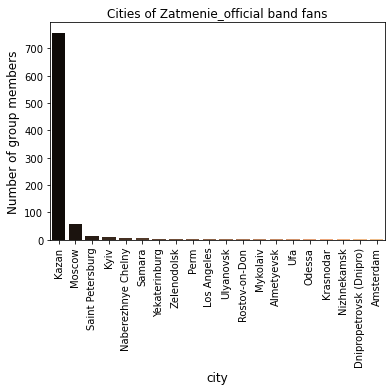

In [16]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of Zatmenie_official band fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show()

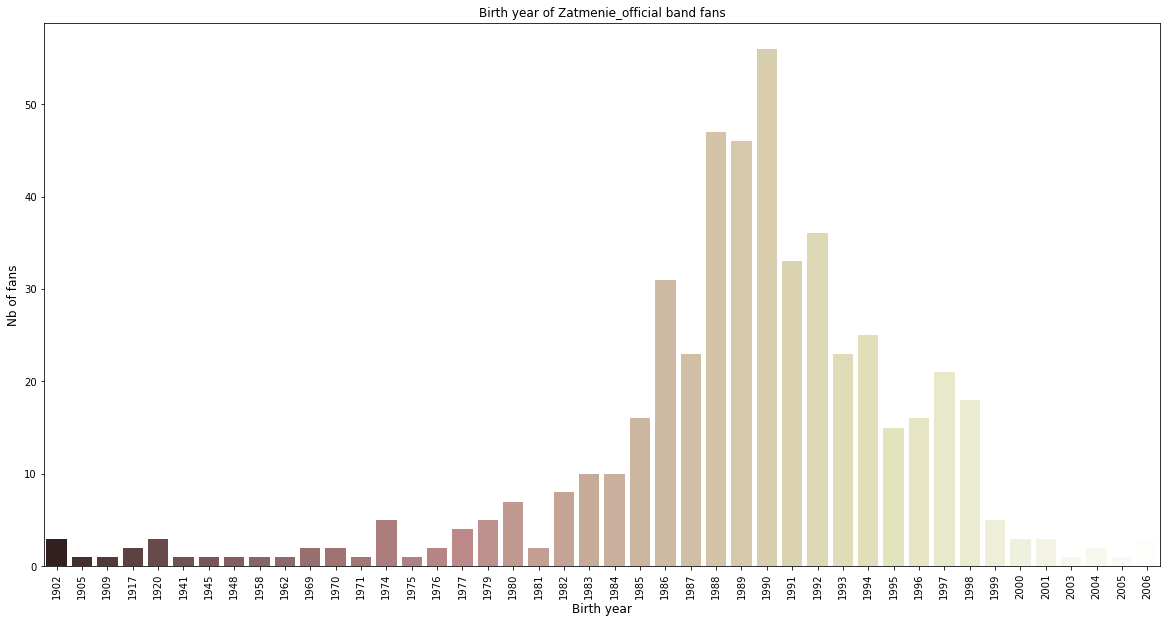

In [61]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='pink') 
plt.title('Birth year of Zatmenie_official band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

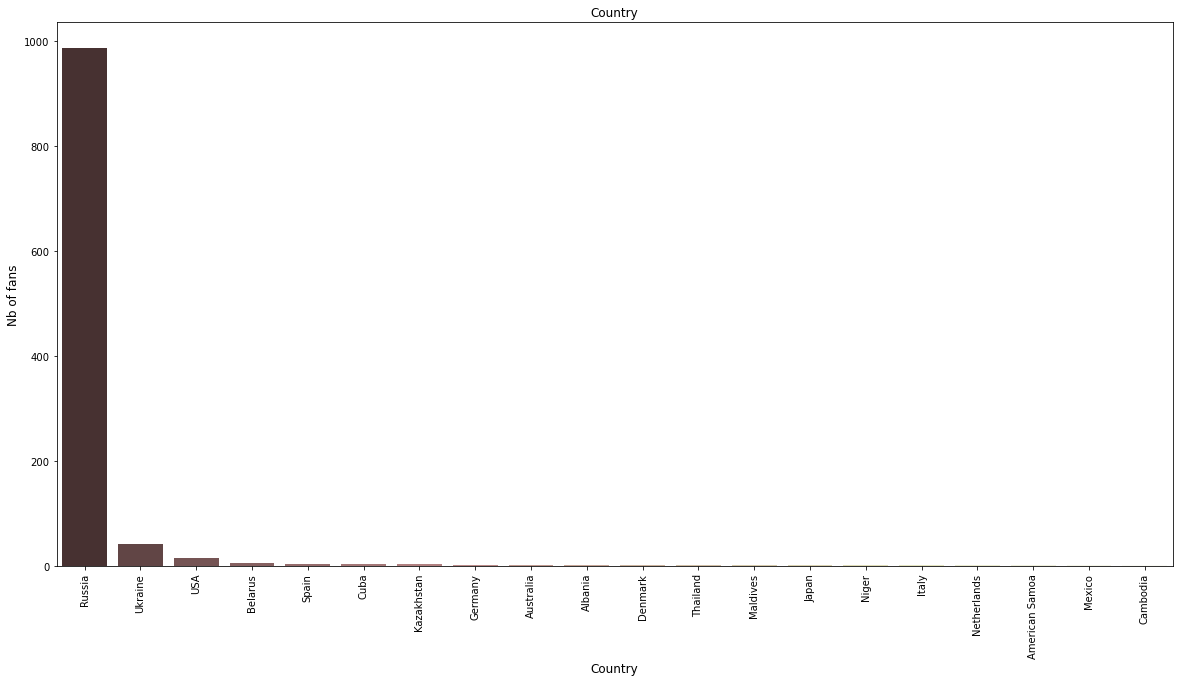

In [17]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Country")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [18]:
df.loc[(df['city'] == 'Moscow')] = "msk + kzn"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

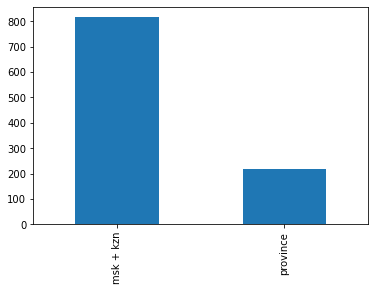

In [19]:
axes = city_count.plot.bar() 

In [20]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

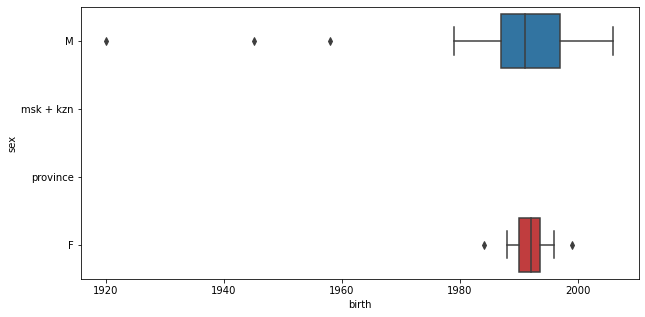

In [21]:
plt.figure(figsize=(10,5)) 
sns.boxplot(x="birth", y="sex", data=new_df) 
plt.show()

In [22]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    
    
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [23]:
zatmenie_official_posts = get_posts("zatmenie_official")

In [24]:
for post in zatmenie_official_posts[:10]:
    print(post)

Предлагаю вашему вниманию мой сольный лирический трек, собранный на протяжении 3-х лет, в который вложена частичка души и годы отсутствия. Посвящается всем нашенским, всем близким и родным мне людям. "Это душевная сага, таким же во благо..." 
Салам Всем Достойным
Стихотворение. 2020г. Автор: Феникс
Пока в разработке новые треки, понастальгируем стареньким андером былой юности. Доброго👐

(2015 год, альбом "Держи марку")
Зимняя совместка с Булатом из ТАСМА 87. Принять участия в сведении не удалось в силу моего отсутствия, но вроде не плохо 😉
😊
По просьбе людей зачел на камеру куплет. трек новый, сырой, настроение праздное, так что строго не судите. Всем НАШЕНСКИМ посвящается😉👋






In [21]:
print (zatmenie_official_posts)

['Предлагаю вашему вниманию мой сольный лирический трек, собранный на протяжении 3-х лет, в который вложена частичка души и годы отсутствия. Посвящается всем нашенским, всем близким и родным мне людям. "Это душевная сага, таким же во благо..." \nСалам Всем Достойным', 'Стихотворение. 2020г. Автор: Феникс', 'Пока в разработке новые треки, понастальгируем стареньким андером былой юности. Доброго👐\n\n(2015 год, альбом "Держи марку")', 'Зимняя совместка с Булатом из ТАСМА 87. Принять участия в сведении не удалось в силу моего отсутствия, но вроде не плохо 😉', '😊', 'По просьбе людей зачел на камеру куплет. трек новый, сырой, настроение праздное, так что строго не судите. Всем НАШЕНСКИМ посвящается😉👋', '', '', '', '', '', '', '', '', 'Zatmenie [Fenix] - Невидимые цепи (демо)', 'Стихи', 'Новый трек. В процессе сведения', '', '', '"Первые впечатления" (18+)\n\nлуч света в хату промелькнул, \nно не сказать что солнцу рады\nсквозь стены слышен караул \nи вновь ебучая баланда\nусловья тьма, суров

In [25]:
zatmenie_official = " "
for i in zatmenie_official_posts:
    zatmenie_official += str(i)
zatmenie_official = re.sub('\[(id|club)\d*\|[А-Яа-я A-Za-z0-9ёЁ\-\,\@\(\)\"\'\:\«\»\|\$\^\&\*\’\.\`]*\]', '', zatmenie_official)

In [23]:
print (zatmenie_official)

 Предлагаю вашему вниманию мой сольный лирический трек, собранный на протяжении 3-х лет, в который вложена частичка души и годы отсутствия. Посвящается всем нашенским, всем близким и родным мне людям. "Это душевная сага, таким же во благо..." 
Салам Всем ДостойнымСтихотворение. 2020г. Автор: ФениксПока в разработке новые треки, понастальгируем стареньким андером былой юности. Доброго👐

(2015 год, альбом "Держи марку")Зимняя совместка с Булатом из ТАСМА 87. Принять участия в сведении не удалось в силу моего отсутствия, но вроде не плохо 😉😊По просьбе людей зачел на камеру куплет. трек новый, сырой, настроение праздное, так что строго не судите. Всем НАШЕНСКИМ посвящается😉👋Zatmenie [Fenix] - Невидимые цепи (демо)СтихиНовый трек. В процессе сведения"Первые впечатления" (18+)

луч света в хату промелькнул, 
но не сказать что солнцу рады
сквозь стены слышен караул 
и вновь ебучая баланда
условья тьма, суровый быт
у мусаров всегда на мушке
в хатах у нас перелимит
холодная тюрьма-старушка
шкон

In [24]:
pattern_link = re.compile(r"[A-z0-9]+[/.\/:]+[A-z0-9_]+[\.\/]+[A-z0-9]+[A-z1-9/\.]+\b")

In [25]:
print(re.sub(pattern_link, "WEBLINK", zatmenie_official))

 Предлагаю вашему вниманию мой сольный лирический трек, собранный на протяжении 3-х лет, в который вложена частичка души и годы отсутствия. Посвящается всем нашенским, всем близким и родным мне людям. "Это душевная сага, таким же во благо..." 
Салам Всем ДостойнымСтихотворение. 2020г. Автор: ФениксПока в разработке новые треки, понастальгируем стареньким андером былой юности. Доброго👐

(2015 год, альбом "Держи марку")Зимняя совместка с Булатом из ТАСМА 87. Принять участия в сведении не удалось в силу моего отсутствия, но вроде не плохо 😉😊По просьбе людей зачел на камеру куплет. трек новый, сырой, настроение праздное, так что строго не судите. Всем НАШЕНСКИМ посвящается😉👋Zatmenie [Fenix] - Невидимые цепи (демо)СтихиНовый трек. В процессе сведения"Первые впечатления" (18+)

луч света в хату промелькнул, 
но не сказать что солнцу рады
сквозь стены слышен караул 
и вновь ебучая баланда
условья тьма, суровый быт
у мусаров всегда на мушке
в хатах у нас перелимит
холодная тюрьма-старушка
шкон

In [26]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post) 

In [27]:
aigelmusic_posts = get_posts("zatmenie_official")

save_posts_to_file("zatmenie_official_posts.tsv", zatmenie_official)

In [28]:
concert_counter = re.findall(r'К|концерт', zatmenie_official)
print("Концертов у Zatmenie_official:", len(concert_counter))

Концертов у Zatmenie_official: 24


In [28]:
!pip install natasha

In [29]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [30]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [34]:
doc = Doc(zatmenie_official)
doc.segment(segmenter)

In [35]:
[i.text for i in doc.sents]

['Предлагаю вашему вниманию мой сольный лирический трек, собранный на протяжении 3-х лет, в который вложена частичка души и годы отсутствия.',
 'Посвящается всем нашенским, всем близким и родным мне людям.',
 '"Это душевная сага, таким же во благо..."',
 'Салам Всем ДостойнымСтихотворение.',
 '2020г. Автор: ФениксПока в разработке новые треки, понастальгируем стареньким андером былой юности.',
 'Доброго👐\n\n(2015 год, альбом "Держи марку")Зимняя совместка с Булатом из ТАСМА 87.',
 'Принять участия в сведении не удалось в силу моего отсутствия, но вроде не плохо 😉😊По просьбе людей зачел на камеру куплет. трек новый, сырой, настроение праздное, так что строго не судите.',
 'Всем НАШЕНСКИМ посвящается😉👋Zatmenie [Fenix] - Невидимые цепи (демо)СтихиНовый трек.',
 'В процессе сведения"Первые впечатления" (18+)\n\nлуч света в хату промелькнул, \nно не сказать что солнцу рады\nсквозь стены слышен караул \nи вновь ебучая баланда\nусловья тьма, суровый быт\nу мусаров всегда на мушке\nв хатах у н

In [36]:
print([i.text for i in doc.tokens])

['Предлагаю', 'вашему', 'вниманию', 'мой', 'сольный', 'лирический', 'трек', ',', 'собранный', 'на', 'протяжении', '3-х', 'лет', ',', 'в', 'который', 'вложена', 'частичка', 'души', 'и', 'годы', 'отсутствия', '.', 'Посвящается', 'всем', 'нашенским', ',', 'всем', 'близким', 'и', 'родным', 'мне', 'людям', '.', '"', 'Это', 'душевная', 'сага', ',', 'таким', 'же', 'во', 'благо', '...', '"', 'Салам', 'Всем', 'ДостойнымСтихотворение', '.', '2020', 'г', '.', 'Автор', ':', 'ФениксПока', 'в', 'разработке', 'новые', 'треки', ',', 'понастальгируем', 'стареньким', 'андером', 'былой', 'юности', '.', 'Доброго👐', '(', '2015', 'год', ',', 'альбом', '"', 'Держи', 'марку', '"', ')', 'Зимняя', 'совместка', 'с', 'Булатом', 'из', 'ТАСМА', '87', '.', 'Принять', 'участия', 'в', 'сведении', 'не', 'удалось', 'в', 'силу', 'моего', 'отсутствия', ',', 'но', 'вроде', 'не', 'плохо', '😉😊По', 'просьбе', 'людей', 'зачел', 'на', 'камеру', 'куплет', '.', 'трек', 'новый', ',', 'сырой', ',', 'настроение', 'праздное', ',', 'т

In [37]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [38]:
print([i.lemma for i in doc.tokens])

['предлагать', 'ваш', 'внимание', 'мой', 'сольный', 'лирический', 'трек', ',', 'собрать', 'на', 'протяжение', '3-х', 'год', ',', 'в', 'который', 'вложить', 'частичка', 'душа', 'и', 'год', 'отсутствие', '.', 'посвящаться', 'весь', 'нашенский', ',', 'весь', 'близкие', 'и', 'родные', 'я', 'человек', '.', '"', 'это', 'душевный', 'сага', ',', 'такой', 'же', 'в', 'благо', '...', '"', 'сало', 'весь', 'достойнымстихотворение', '.', '2020', 'г', '.', 'автор', ':', 'феникспока', 'в', 'разработка', 'новый', 'трек', ',', 'понастальгировать', 'старенький', 'андер', 'былой', 'юность', '.', 'доброго👐', '(', '2015', 'год', ',', 'альбом', '"', 'держать', 'марку', '"', ')', 'зимний', 'совместка', 'с', 'булат', 'из', 'тасмо', '87', '.', 'принять', 'участие', 'в', 'сведение', 'не', 'удаться', 'в', 'сила', 'мой', 'отсутствие', ',', 'но', 'вроде', 'не', 'плохой', '😉😊по', 'просьба', 'человек', 'зачесть', 'на', 'камера', 'куплет', '.', 'трек', 'новый', ',', 'сырой', ',', 'настроение', 'праздный', ',', 'так', 

In [39]:
doc.tag_ner(ner_tagger)

In [40]:
locations = set()
persons = set()
organizations = set()

with open("zatmenie_official_posts.tsv", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [41]:
print(locations)

{'КАЗАНЬ', 'Женек Крест', 'Социум щит'}
